# Importing Dataset

In [2]:
 # configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download gauravduttakiit/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 108MB/s]


In [6]:
from zipfile import ZipFile

In [7]:
file_name = "/content/resume-dataset.zip"

with ZipFile(file_name , "r") as zip:
  zip.extractall()

print("Done")

Done


# Importing Dependencies

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

In [11]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [12]:
df.head(3)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."


In [14]:
df.shape

(962, 2)

In [13]:
df.isnull().sum()

,0
Category,0
Resume,0


# Visulize The Data

<Axes: xlabel='Category', ylabel='count'>

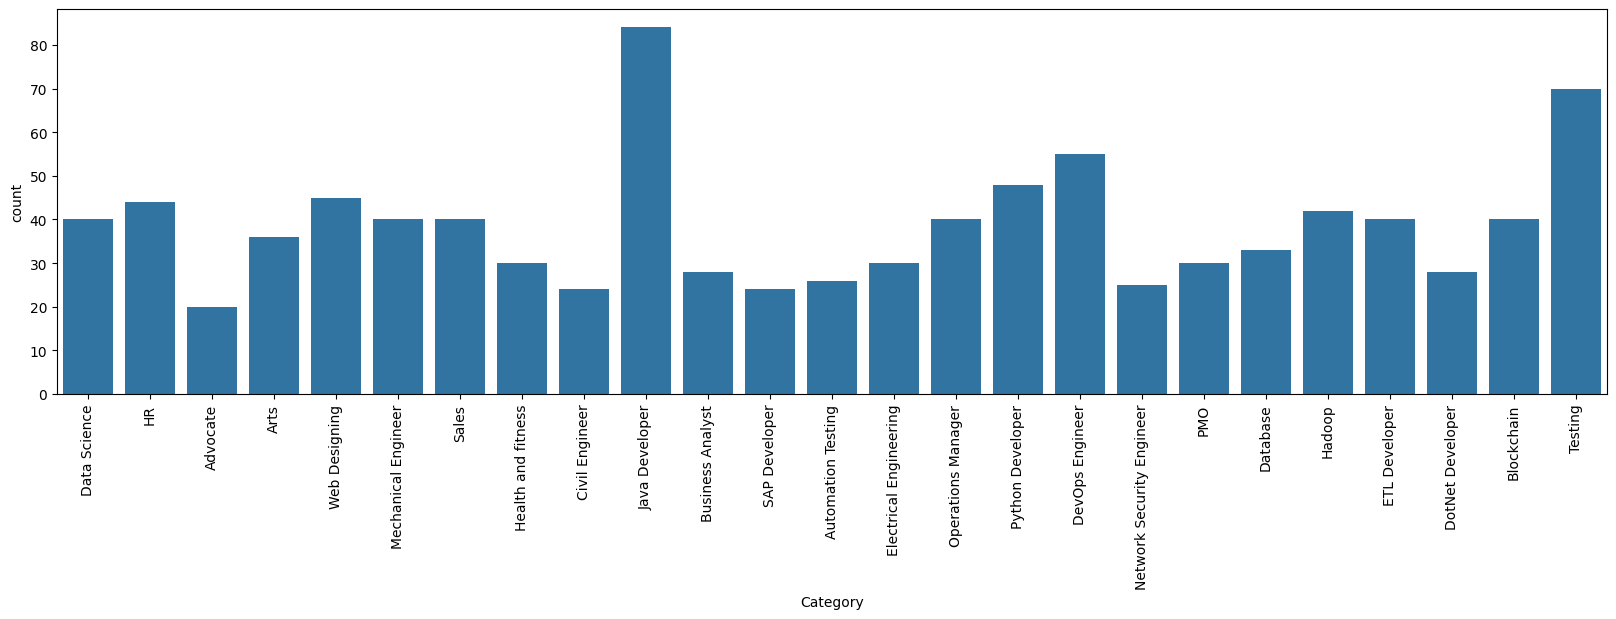

In [18]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.countplot(x=df['Category'])

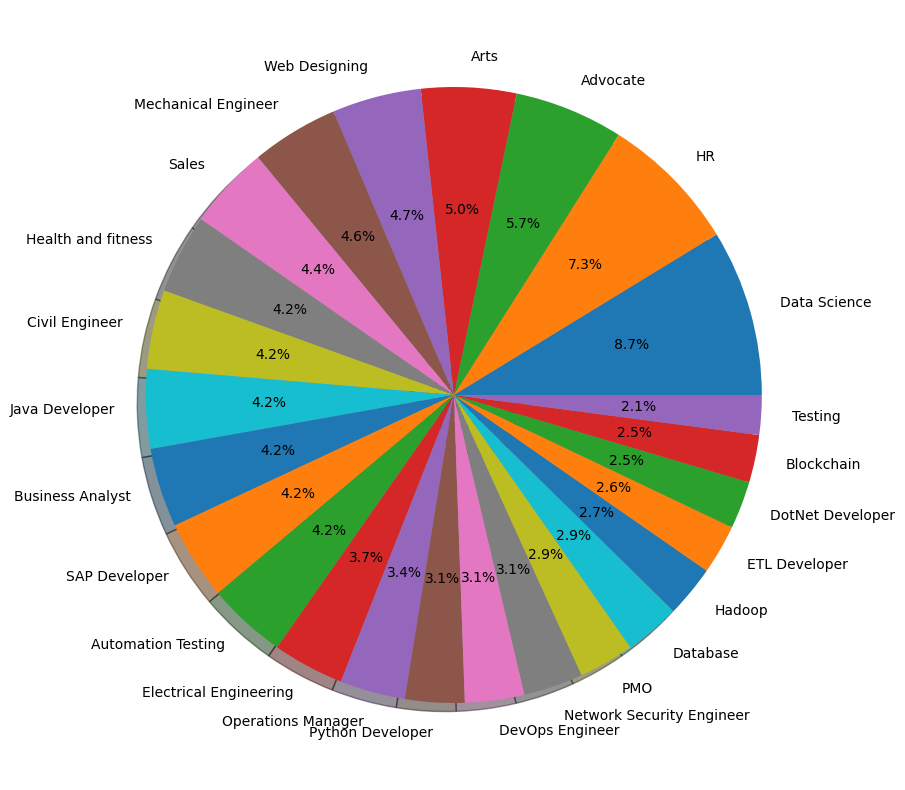

In [26]:
target_count = df['Category'].value_counts()
label_count = df['Category'].unique()

plt.figure(figsize=(10,10))

plt.pie(target_count, labels=label_count , autopct='%1.1f%%' , shadow=True )
plt.show()

# Text Preprocessing

In [45]:
import nltk
import re
import string

In [46]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [62]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [83]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  tokens = word_tokenize(text)

  stop_word = set(stopwords.words('english')),
  tokens = [word for word in tokens if word not in stop_word]

  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return " ".join(tokens)

In [84]:
df['Resume'] = df['Resume'].apply(preprocess_text)

In [86]:
df['Resume'][0]

'skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3 j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young llp description fraud investigation and dispute service assurance technology assisted review tar technology assisted review assist in accelerating the review process an

# Vectorization

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])

clean_text = tfidf.transform(df['Resume'])

In [89]:
clean_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 155874 stored elements and shape (962, 6575)>

# Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [72]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


In [73]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [74]:
encoder = LabelEncoder()
encoder.fit(df['Category'])

LabelEncoder()

In [75]:
df['Category'] = encoder.transform(df['Category'])

In [77]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Split The Target And Features

In [90]:
X = clean_text
y = df['Category']

# Split The Feature And Target In Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [91]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Train The Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier

In [92]:
Kn = OneVsOneClassifier(KNeighborsClassifier())
Kn.fit(X_train , y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier())

# Evaluate The Model

In [95]:
from sklearn.metrics import classification_report , confusion_matrix

In [94]:
Kn.score(X_train , y_train)*100 , Kn.score(X_test , y_test)*100

(99.08972691807543, 98.44559585492227)

In [97]:
y_pred = Kn.predict(X_test)

In [103]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

<Axes: >

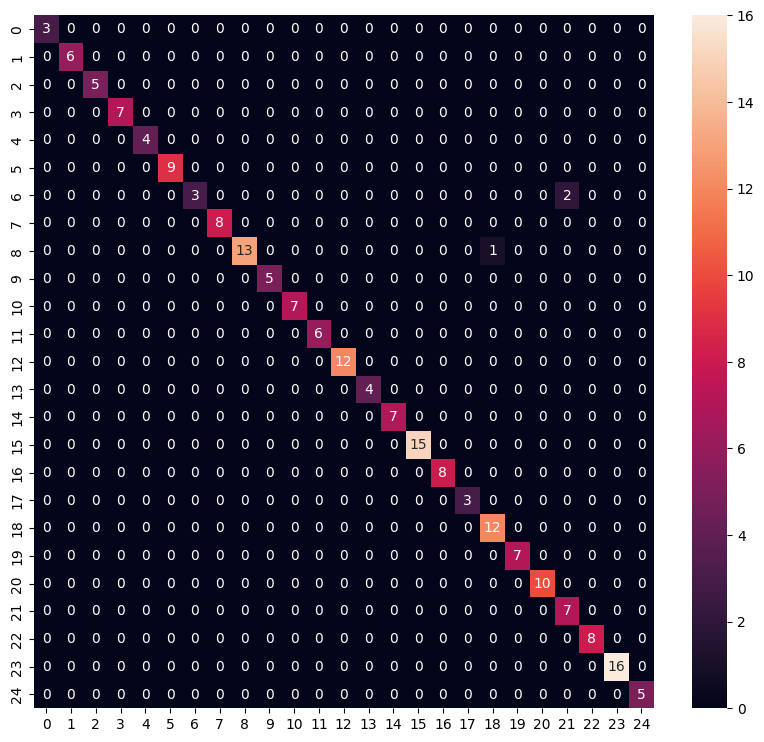

In [102]:
plt.figure(figsize=(10,9))

conf_matx = confusion_matrix(y_test , y_pred)

sns.heatmap(conf_matx , annot=True , fmt='d')